# Project 1 - Oregon Wildfire Data

In [1]:
import json
import requests
from config import api_key
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
weather_data_path = "portland_weather_data.csv"
weather_data = pd.read_csv(weather_data_path)

weather_data


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-01,0.00,0.0,0.0,38,46,29
1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-02,0.00,0.0,0.0,38,44,30
2,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-03,0.00,0.0,0.0,39,47,34
3,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-04,0.05,0.0,0.0,42,45,39
4,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-05,0.22,0.0,0.0,41,53,39
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-27,1.21,0.0,0.0,47,55,44
1822,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-28,0.00,0.0,0.0,46,49,42
1823,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-29,0.53,0.0,0.0,44,45,42
1824,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-30,0.30,0.0,0.0,47,55,42


In [12]:
weather_data_2 = weather_data.copy()

weather_data_2['DATE'] = pd.to_datetime(weather_data_2['DATE'])

weather_data_2

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-01,0.00,0.0,0.0,38,46,29
1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-02,0.00,0.0,0.0,38,44,30
2,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-03,0.00,0.0,0.0,39,47,34
3,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-04,0.05,0.0,0.0,42,45,39
4,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2018-01-05,0.22,0.0,0.0,41,53,39
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-27,1.21,0.0,0.0,47,55,44
1822,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-28,0.00,0.0,0.0,46,49,42
1823,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-29,0.53,0.0,0.0,44,45,42
1824,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-30,0.30,0.0,0.0,47,55,42


In [16]:
monthly_summary = weather_data_2.groupby(pd.Grouper(key="DATE", freq="M")).mean()
monthly_summary = monthly_summary.reset_index()
monthly_summary

C:\Users\dmrop\AppData\Local\Temp\ipykernel_35384\8359116.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_summary = weather_data_2.groupby(pd.Grouper(key="DATE", freq="M")).mean()


,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,2018-01-31,45.59578,-122.60919,6.7,0.172903,0.000000,0.000000,45.096774,50.838710,40.354839
1,2018-02-28,45.59578,-122.60919,6.7,0.066429,0.235714,0.221429,42.535714,49.035714,35.928571
2,2018-03-31,45.59578,-122.60919,6.7,0.080645,0.000000,0.000000,46.838710,55.774194,38.548387
3,2018-04-30,45.59578,-122.60919,6.7,0.111333,0.000000,0.000000,53.333333,62.133333,45.366667
4,2018-05-31,45.59578,-122.60919,6.7,0.005484,0.000000,0.000000,61.870968,73.612903,52.419355
5,2018-06-30,45.59578,-122.60919,6.7,0.034333,0.000000,0.000000,64.333333,76.200000,55.266667
6,2018-07-31,45.59578,-122.60919,6.7,0.000645,0.000000,0.000000,72.870968,87.516129,60.548387
7,2018-08-31,45.59578,-122.60919,6.7,0.001935,0.000000,0.000000,70.967742,84.290323,60.000000
8,2018-09-30,45.59578,-122.60919,6.7,0.053000,0.000000,0.000000,63.566667,75.900000,52.833333
9,2018-10-31,45.59578,-122.60919,6.7,0.110645,0.000000,0.000000,55.935484,66.064516,47.064516


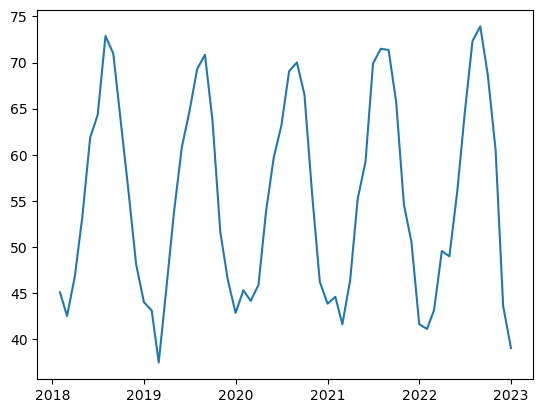

In [17]:
plt.plot(monthly_summary["DATE"], monthly_summary["TAVG"])
plt.show()

In [3]:
base_url = "https://history.openweathermap.org/data/2.5/history/city?q="
city = "Portland"
state_code = "US-OR"
country_code = "US"
start_date = "1514793600"
end_date = "1672559999"

#query_url = f"https://history.openweathermap.org/data/2.5/history/city?q={city},{state_code},{country_code}&type=hour&start={start_date}&end={end_date}&appid={api_key}"
#query_url = f"https://api.openweathermap.org/data/3.0/onecall/day_summary?lat=45.5152&lon=122.6784&date=2022-08-30&tz=+03:00&units=imperial&appid={api_key}"
#query_url = f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=39.099724&lon=-94.578331&dt=1643803200&appid={api_key}"

In [4]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?"

#query_url = base_url + "appid=" + api_key + "&q=" + city

In [5]:
response = requests.get(query_url).json()

print(json.dumps(response, indent=4, sort_keys=True))


NameError: name 'query_url' is not defined